 <title> Fixing Holidays</title>


# Fixing Holidays


Since our dataset had tonnes of anomalies we had to scrape the internet for a dataset on holidays to be appended to our dataset for better yields in results.
This notebook was worked on exclusively to get detailed information on the number, kinds, duration and popularity of holidays that can affect the ATM withdrawal patterns.
Furthermore, logically we know this will heavily impact the withdrawals but statistically how majorly it would influence was also one of the debating question which needed to be answered.


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

## Merging Holiday Dataframe with Aggregated Data


We look at the acquired dataset for holidays corresponding to the dates in our withdrawal dataset.
This dataset also has a categorical feature for the type of holiday which would structure our dataset better.


In [2]:
holiday_df_filtered = pd.read_csv('../data/final_holidays.csv')
holiday_df_filtered['Date'] = pd.to_datetime(holiday_df_filtered['Date'], format='%Y-%m-%d')

Here we can see the structure of the acquired dataset on Holidays. 'Type' column is noteworthy for classification of dates in terms of impact on the withdrawal instead of names of holidays/festivals.


In [3]:
# La data original tiene este rango
# MIN:  2023-06-02 00:00:00
# MAX:  2024-04-14 00:00:00

holiday_df_filtered = holiday_df_filtered.loc[
    (holiday_df_filtered['Date'] > pd.to_datetime("2023-06-02")) &
    (holiday_df_filtered['Date'] < pd.to_datetime("2024-04-14"))
]
print("MIN: ", holiday_df_filtered['Date'].min())
print("MAX: ", holiday_df_filtered['Date'].max())

MIN:  2023-06-07 00:00:00
MAX:  2024-03-31 00:00:00


In [18]:
holiday_df_filtered.head(17)

,Date,Name,Weekday,Type
120,2023-06-07,Flag Day,WEDNESDAY,Observance
121,2023-06-18,Fathers' Day,SUNDAY,Observance
122,2023-06-24,Farmer Day,SATURDAY,Observance
123,2023-06-29,St Peter and St Paul,THURSDAY,National holiday
124,2023-06-30,Public Sector Holiday,FRIDAY,Public Sector Holiday
125,2023-07-06,Day of the Friend,THURSDAY,Observance
126,2023-07-23,Peruvian Air Force Day,SUNDAY,National holiday
127,2023-07-27,Public Sector Holiday,THURSDAY,Public Sector Holiday
128,2023-07-28,Independence Day,FRIDAY,National holiday
129,2023-07-29,Independence Day (day 2),SATURDAY,National holiday


Hence we dropped the 'Name' column and 'Weekday' column as we already have that in the original dataset.


In [4]:
holiday_df_filtered_for_merge = holiday_df_filtered.drop(['Name', 'Weekday'], axis=1)
holiday_df_filtered_for_merge.head()

,Date,Type
120,2023-06-07,Observance
121,2023-06-18,Observance
122,2023-06-24,Observance
123,2023-06-29,National holiday
124,2023-06-30,Public Sector Holiday


A small fix on datetime format to have continuity in format


In [7]:
aggregated_data = pd.read_csv('../data/Datafest2024_Merged.csv')
aggregated_data['fecha_transaccion'] = pd.to_datetime(aggregated_data['fecha_transaccion'], format='%Y-%m-%d')

In [8]:
# AGREGANDO EL DÍA DE SEMANA
# aggregated_data['Weekday'] = aggregated_data['Transaction Date'].dt.day_name().str.upper()
aggregated_data.head()

,fecha_transaccion,codigo_cajero,tipo_cajero,saldo_inicial,demanda,abastecimiento,saldo_final
0,2023-06-02,6,B,644690.0,243020.0,0.0,401670.0
1,2023-06-02,32,B,775480.0,265420.0,0.0,510060.0
2,2023-06-02,116,B,668240.0,244340.0,0.0,423900.0
3,2023-06-02,525,A,30110.0,8250.0,226470.0,248330.0
4,2023-06-02,302,A,70720.0,11760.0,350460.0,409420.0


## Actual Merge Operation

<p> Left Outer Join is performed with left = ATM Data and right = Holidays Data on the Date columns because we want to retain all rows from the ATM Data and join rows only matching date is found in Holidays Data and otherwise the holiday columns can be left with NaN </p>


In [9]:
aggregated_data_with_holidays = aggregated_data.merge(right=holiday_df_filtered_for_merge, how='left', left_on='fecha_transaccion', right_on='Date')
aggregated_data_with_holidays.drop('Date', axis=1, inplace=True)

In [10]:
aggregated_data_with_holidays.loc[(aggregated_data_with_holidays['codigo_cajero'] == 1)]
# aggregated_data_with_holidays.head()

,fecha_transaccion,codigo_cajero,tipo_cajero,saldo_inicial,demanda,abastecimiento,saldo_final,Type
654,2023-06-02,1,B,647830.0,384630.0,0.0,263200.0,NaN
1198,2023-06-03,1,B,263200.0,251860.0,0.0,11340.0,NaN
1614,2023-06-04,1,B,11340.0,-52910.0,0.0,64250.0,NaN
2519,2023-06-05,1,B,64250.0,24710.0,357330.0,396870.0,NaN
3133,2023-06-06,1,B,396870.0,44010.0,0.0,352860.0,NaN
...,...,...,...,...,...,...,...,...
244736,2024-05-16,1,B,419320.0,14510.0,494530.0,899340.0,NaN
245369,2024-05-17,1,B,899340.0,355740.0,0.0,543600.0,NaN
246070,2024-05-18,1,B,543600.0,455110.0,0.0,88490.0,NaN
246771,2024-05-19,1,B,88490.0,17810.0,0.0,70680.0,NaN


## Verifying whether number of rows before and after merge are the same


In [11]:
bs_data = aggregated_data[aggregated_data['codigo_cajero'] == 1]
bs_data_holiday = aggregated_data_with_holidays[aggregated_data_with_holidays['codigo_cajero'] == 1]
print(len(bs_data))
print(len(bs_data_holiday))

354
354


## Filling in NaN values in Type Column with No Holiday value

Because Left Outer Join was performed, all unmatched dates will have NaN in Type column of new merged DataFrame


In [12]:
aggregated_data_with_holidays.fillna(value='No Holiday', inplace=True)

aggregated_data_with_holidays.head(6)

,fecha_transaccion,codigo_cajero,tipo_cajero,saldo_inicial,demanda,abastecimiento,saldo_final,Type
0,2023-06-02,6,B,644690.0,243020.0,0.0,401670.0,No Holiday
1,2023-06-02,32,B,775480.0,265420.0,0.0,510060.0,No Holiday
2,2023-06-02,116,B,668240.0,244340.0,0.0,423900.0,No Holiday
3,2023-06-02,525,A,30110.0,8250.0,226470.0,248330.0,No Holiday
4,2023-06-02,302,A,70720.0,11760.0,350460.0,409420.0,No Holiday
5,2023-06-02,416,A,40820.0,55920.0,373740.0,358640.0,No Holiday


## Fixing Weekday

Applying the strftime('%A') function on each row of the data on the Date column will give the correct Weekday

This fix was done as we saw a few anomalies in the weekday column where few weekdays were repeated on successive dates.


In [13]:
aggregated_data_with_holidays['Weekday'] = aggregated_data_with_holidays.apply(lambda x: x['fecha_transaccion'].strftime('%A').upper(), axis=1)

In [14]:
aggregated_data_with_holidays.head()

,fecha_transaccion,codigo_cajero,tipo_cajero,saldo_inicial,demanda,abastecimiento,saldo_final,Type,Weekday
0,2023-06-02,6,B,644690.0,243020.0,0.0,401670.0,No Holiday,FRIDAY
1,2023-06-02,32,B,775480.0,265420.0,0.0,510060.0,No Holiday,FRIDAY
2,2023-06-02,116,B,668240.0,244340.0,0.0,423900.0,No Holiday,FRIDAY
3,2023-06-02,525,A,30110.0,8250.0,226470.0,248330.0,No Holiday,FRIDAY
4,2023-06-02,302,A,70720.0,11760.0,350460.0,409420.0,No Holiday,FRIDAY


## Verifying whether Fix was proper (check 2012-05-01 onwards which was a problem before)


In [ ]:
# No lo ejecuté
# bs_data = aggregated_data_with_holidays[aggregated_data_with_holidays['ATM Name'] == 'Big Street ATM']
# bs_data[bs_data['Festival Religion'] == 'N']

## Adding Weekend as Holidays (only if they weren't marked as holidays before itself)


In [11]:
# aggregated_data_with_holidays['Type'] = aggregated_data_with_holidays.apply(lambda x: 
#                                                                             'Weekend' if x['Type'] == 'No Holiday' 
#                                                                             and x['Weekday'] in ['SATURDAY', 'SUNDAY'] 
#                                                                             else x['Type'], axis=1)


## Fixing Holiday Sequence and breaking it into three columns. Also Fixing Working Day and converting it to IsHoliday

<p> A day is a Holiday only if it is a Gazetted or Restricted Holiday </p>
<p> Weekends are not considered as holidays but they still get importance because of the IsWeekday column being stored as False for Weekends </p>
<p> Logic is, for each row in the dataframe, find yesterday's date and tomorrow's date, then check whether all three of them are holidays or not, by checking whether they are present in the holidays dataframe and thus get the overall sequence for a single day and append holiday status of each day to their respective lists which would end up becoming the three new isHoliday columns in the DataFrame </p>


In [15]:
aggregated_data_with_holidays
print("MIN: ", aggregated_data_with_holidays['fecha_transaccion'].min())
print("MAX: ", aggregated_data_with_holidays['fecha_transaccion'].max())

MIN:  2023-06-02 00:00:00
MAX:  2024-05-20 00:00:00


In [16]:
all_holiday_dates = set(holiday_df_filtered['Date'])
holiday_sequence_list = []
today_holiday_list = []
yesterday_holiday_list = []
tomorrow_holiday_list = []
for i in range(len(aggregated_data_with_holidays)):
    # iloc[row_number_index, column_number_index]
    # Transaction Date is second column so its index is 1
    today_date = aggregated_data_with_holidays.iloc[i, 0] # le puse 0 pq indica la columna en que está la fecha
    yesterday_date = today_date - timedelta(days=1)
    tomorrow_date = today_date + timedelta(days=1)

    # La data original tiene este rango
    # MIN:  2023-06-02 00:00:00
    # MAX:  2024-04-14 00:00:00
    
    # Hardcode Holiday Sequence for first and last days in dataset
    if today_date == datetime(2023, 6, 2): # MODIFIQUÉ LA FECHA
        holiday_sequence = 'WHH'
        
    elif today_date == datetime(2024, 4, 14): # MODIFIQUÉ LA FECHA
        holiday_sequence = 'HHH'
        
    # Else for today, yesterday and tomorrow check whether they are a holiday or a weekend date, if yes, append "H", else "W"
    else:
        holiday_sequence = ""
        for date in [yesterday_date, today_date, tomorrow_date]:
            # if (date in all_holiday_dates) or (date.strftime('%A') in ['Saturday', 'Sunday']):
            if date in all_holiday_dates:
                holiday_sequence += "H"
            else:
                holiday_sequence += "W"
    
    holiday_sequence_list.append(holiday_sequence)
    yesterday_holiday_list.append(True if holiday_sequence[0] == 'H' else False)
    today_holiday_list.append(True if holiday_sequence[1] == 'H' else False)
    tomorrow_holiday_list.append(True if holiday_sequence[2] == 'H' else False)

## Adding the Holiday Sequence column

Taking a deepcopy of the dataset to append the holiday sequence generated.


In [17]:
new_agg = aggregated_data_with_holidays.copy(deep=True)
new_agg['Holiday Sequence'] = holiday_sequence_list
new_agg['isYesterdayHoliday'] = yesterday_holiday_list
new_agg['isHoliday'] = today_holiday_list
new_agg['isTomorrowHoliday'] = tomorrow_holiday_list

In [18]:
new_agg.head()

,fecha_transaccion,codigo_cajero,tipo_cajero,saldo_inicial,demanda,abastecimiento,saldo_final,Type,Weekday,Holiday Sequence,isYesterdayHoliday,isHoliday,isTomorrowHoliday
0,2023-06-02,6,B,644690.0,243020.0,0.0,401670.0,No Holiday,FRIDAY,WHH,False,True,True
1,2023-06-02,32,B,775480.0,265420.0,0.0,510060.0,No Holiday,FRIDAY,WHH,False,True,True
2,2023-06-02,116,B,668240.0,244340.0,0.0,423900.0,No Holiday,FRIDAY,WHH,False,True,True
3,2023-06-02,525,A,30110.0,8250.0,226470.0,248330.0,No Holiday,FRIDAY,WHH,False,True,True
4,2023-06-02,302,A,70720.0,11760.0,350460.0,409420.0,No Holiday,FRIDAY,WHH,False,True,True


In [19]:
new_agg.columns

Index(['fecha_transaccion', 'codigo_cajero', 'tipo_cajero', 'saldo_inicial',
       'demanda', 'abastecimiento', 'saldo_final', 'Type', 'Weekday',
       'Holiday Sequence', 'isYesterdayHoliday', 'isHoliday',
       'isTomorrowHoliday'],
      dtype='object')

In [20]:
# COPIANDO SOLO LA DATA DE BIG STREET ATM (OJO)
bs_data = new_agg[new_agg['codigo_cajero'] == 1]
# bs_data[['Transaction Date', 'Holiday Sequence', 'Weekday', 'Type', 'isYesterdayHoliday', 'isHoliday', 'isTomorrowHoliday']][bs_data['Festival Religion'] == 'N'].head(10)

Check 26th and 27th January 2012, they had wrong Holiday Sequences before but now its correct


## Generating Boolean columns for isYesterdayWeekday and isTomorrowWeekday

This is similar to knowing the holiday sequence but gives added features to find a correlation in.


In [21]:
new_agg['isYesterdayWeekday'] = new_agg.apply(lambda x: (x['fecha_transaccion'] - timedelta(days=1)).strftime('%A') 
                                              not in ['Saturday', 'Sunday'], axis=1)
new_agg['isTomorrowWeekday'] = new_agg.apply(lambda x: (x['fecha_transaccion'] + timedelta(days=1)).strftime('%A') 
                                              not in ['Saturday', 'Sunday'], axis=1)
new_agg['isWeekday'] = new_agg.apply(lambda x: x['fecha_transaccion'].strftime('%A') 
                                              not in ['Saturday', 'Sunday'], axis=1)

In [22]:
bs_data = new_agg[new_agg['codigo_cajero'] == 1]
bs_data[['fecha_transaccion', 'Weekday', 'Type', 'isYesterdayWeekday', 'isWeekday', 'isTomorrowWeekday']].head(15)

,fecha_transaccion,Weekday,Type,isYesterdayWeekday,isWeekday,isTomorrowWeekday
654,2023-06-02,FRIDAY,No Holiday,True,True,False
1198,2023-06-03,SATURDAY,No Holiday,True,False,False
1614,2023-06-04,SUNDAY,No Holiday,False,False,True
2519,2023-06-05,MONDAY,No Holiday,False,True,True
3133,2023-06-06,TUESDAY,No Holiday,True,True,True
3876,2023-06-07,WEDNESDAY,Observance,True,True,True
4315,2023-06-08,THURSDAY,No Holiday,True,True,True
5278,2023-06-09,FRIDAY,No Holiday,True,True,False
5802,2023-06-10,SATURDAY,No Holiday,True,False,False
6719,2023-06-11,SUNDAY,No Holiday,False,False,True


## Checking for Correlation between new generated columns

If a few columns have no correlation with any other, we can drop them.
Correlation helps us to understand what features should we work on and which features will be a determining factor in terms of running our models.


<Axes: >

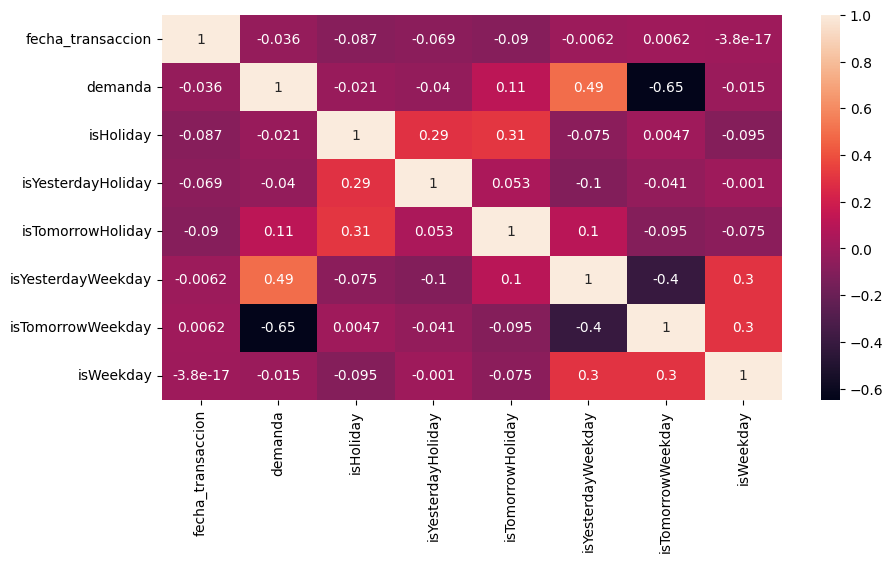

In [23]:
# columns_required = ['Transaction Date', 'Total amount Withdrawn', 'Weekday', 'Type', 
#                     'isHoliday', 'isYesterdayHoliday', 'isTomorrowHoliday', 'isYesterdayWeekday', 
#                     'isTomorrowWeekday', 'isWeekday']

# Medir weekday y type
columns_required = ['fecha_transaccion', 'demanda', 
                    'isHoliday', 'isYesterdayHoliday', 'isTomorrowHoliday', 'isYesterdayWeekday', 
                    'isTomorrowWeekday', 'isWeekday']

corr_atm_df = bs_data[columns_required]

plt.figure(figsize=(10, 5))
sns.heatmap(corr_atm_df.corr(), annot=True)

## Correlation

<p> (isYesterdayWeekday, isTomorrowWeekday) have slight negative correlation and (isWeekday, isYesterdayWeekday), (isWeekday, isTomorrowWeekday) have slight positive correlation </p>

So there is no immediate need to drop these as of yet.
The current dataset is good for running the models as far as the values are concerned.


## Making Final Alterations to the original dataset

So we now include the newly obtained values and columns to our original dataset which had incorrect values or trivial columns.


In [59]:
new_agg.columns

Index(['fecha_transaccion', 'codigo_cajero', 'tipo_cajero', 'saldo_inicial',
       'demanda', 'abastecimiento', 'saldo_final', 'Type', 'Weekday',
       'Holiday Sequence', 'isYesterdayHoliday', 'isHoliday',
       'isTomorrowHoliday', 'isYesterdayWeekday', 'isTomorrowWeekday',
       'isWeekday'],
      dtype='object')

## Dropping Festival Religion, Holiday Sequence & Working Day Columns


In [19]:
# NO LO EJECUTÉ
# new_agg.drop(['Festival Religion', 'Holiday Sequence', 'Working Day'], axis=1, inplace=True)

## Writing new csv


In [24]:
new_agg.to_csv('../data/aggregated_data_cleaning_complete.csv', index=False)

## Creating a new csv that already has all the unnecessary columns dropped and Rainfall Status column added


In [28]:
# new_cleaned_agg = new_agg.copy(deep=True)

In [29]:
# def rainfall_status_check(value):
#     if value == 0:
#         return "No Rain"
#     elif value < 2.5:
#         return "Light Rain"
#     elif value <= 7.6:
#         return "Moderate Rain"
#     elif value <= 50:
#         return "Heavy Rain"
#     else:
#         return "Violent Rain"

In [30]:
# new_cleaned_agg['Rainfall Status'] = new_cleaned_agg['precipMM'].apply(rainfall_status_check)

In [31]:
# new_cleaned_agg.columns

Index(['ATM Name', 'Transaction Date', 'No Of Withdrawals',
       'No Of XYZ Card Withdrawals', 'No Of Other Card Withdrawals',
       'Total amount Withdrawn', 'Amount withdrawn XYZ Card',
       'Amount withdrawn Other Card', 'Weekday', 'maxtempC', 'mintempC',
       'sunHour', 'uvIndex', 'moon_illumination', 'moonrise', 'moonset',
       'sunrise', 'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM',
       'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph',
       'Type', 'isYesterdayHoliday', 'isHoliday', 'isTomorrowHoliday',
       'isYesterdayWeekday', 'isTomorrowWeekday', 'isWeekday',
       'Rainfall Status'],
      dtype='object')

In [32]:
# new_cleaned_agg.drop(['No Of Withdrawals', 'No Of XYZ Card Withdrawals', 'No Of Other Card Withdrawals',
#                       'Amount withdrawn XYZ Card', 'Amount withdrawn Other Card', 
#                       'maxtempC', 'mintempC', 'sunHour', 'uvIndex', 'moon_illumination', 'moonrise', 'moonset',
#                       'sunrise', 'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC', 
#                       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure', 'tempC', 
#                       'visibility', 'winddirDegree', 'windspeedKmph'], axis=1, inplace=True)

## Final dataset look

This is final look of the amended dataset which has been cleaned and updated with suitable values that were obtained.
Keeping most columns categorical is something that will help the model identify patterns easily and a bit accurately.


In [33]:
# new_cleaned_agg.head()

,ATM Name,Transaction Date,Total amount Withdrawn,Weekday,Type,isYesterdayHoliday,isHoliday,isTomorrowHoliday,isYesterdayWeekday,isTomorrowWeekday,isWeekday,Rainfall Status
0,Big Street ATM,2011-01-01,123800,SATURDAY,Restricted Holiday,False,True,True,True,False,False,Light Rain
1,Mount Road ATM,2011-01-01,767900,SATURDAY,Restricted Holiday,False,True,True,True,False,False,Light Rain
2,Airport ATM,2011-01-01,503400,SATURDAY,Restricted Holiday,False,True,True,True,False,False,Light Rain
3,KK Nagar ATM,2011-01-01,945300,SATURDAY,Restricted Holiday,False,True,True,True,False,False,Light Rain
4,Christ College ATM,2011-01-01,287700,SATURDAY,Restricted Holiday,False,True,True,True,False,False,Light Rain


This updated Dataset is now made into a csv file for further usage.


In [34]:
# new_cleaned_agg.to_csv('../data/cleaned_data.csv', index=False)